In [1]:
import torch
from torch import nn
import logging
from credit.models import load_model
import yaml
import os
import xarray as xr
from os.path import join
# from credit.models.skebs_model import SKEBS
from matplotlib import pyplot as plt
import numpy as np
from glob import glob
from cartopy.feature import COASTLINE
from cartopy import crs as ccrs



logger = logging.getLogger(__name__)

In [11]:
# model_dir = "/glade/derecho/scratch/dkimpara/CREDIT_runs/skebs_fcnn_scaled_train"
# model_dir = "/glade/derecho/scratch/dkimpara/CREDIT_runs/fcnn_12h_amp"
# model_dir = "/glade/derecho/scratch/dkimpara/CREDIT_runs/unet_6_12h_train_filter"
model_dir = "/glade/derecho/scratch/dkimpara/CREDIT_runs/base_skebs_untrained"


checkpoint = join(model_dir, "checkpoint.pt")
state_dict = torch.load(checkpoint, map_location="cpu")
model_state_dict = state_dict['model_state_dict']


/glade/derecho/scratch/dkimpara/tmp/ipykernel_21856/854301616.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint, map_location="cpu")


In [13]:
# state_dict = torch.load(checkpoint, map_location=f"{'cpu' if not torch.cuda.is_available() else None}")
print("postblock keys")
postblock_keys = [k for k in model_state_dict.keys() if "postblock" in k]
print(postblock_keys)

postblock keys
[]


In [ ]:
for k in postblock_keys[:-2]:
    print(k)
    print(model_state_dict[k])

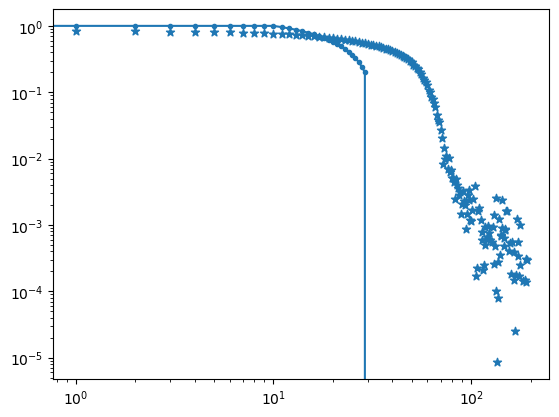

In [19]:
original_backscatter_filter = torch.cat([
                                                    torch.ones(10),
                                                    torch.linspace(1., 0.2, 20),
                                                    torch.zeros(192 - 30)
                                                    ])

spectral_filter = model_state_dict["postblock.operations.0.spectral_backscatter_filter"].squeeze()
plt.scatter(np.arange(spectral_filter.shape[0]), spectral_filter, marker="*")
plt.plot(np.arange(spectral_filter.shape[0]), original_backscatter_filter, marker=".")
plt.xscale("log")
plt.yscale("log")


/glade/derecho/scratch/dkimpara/CREDIT_runs/fcnn_12h_amp/debug_skebs/spectral_filter_9100
/glade/derecho/scratch/dkimpara/CREDIT_runs/fcnn_12h_amp/debug_skebs/spectral_filter_13400
/glade/derecho/scratch/dkimpara/CREDIT_runs/fcnn_12h_amp/debug_skebs/spectral_filter_9000


/glade/derecho/scratch/dkimpara/tmp/ipykernel_71940/3037185266.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  spectral_filter = torch.load(all_filters[index], map_locat

Text(0, 0.5, 'spectral filter')

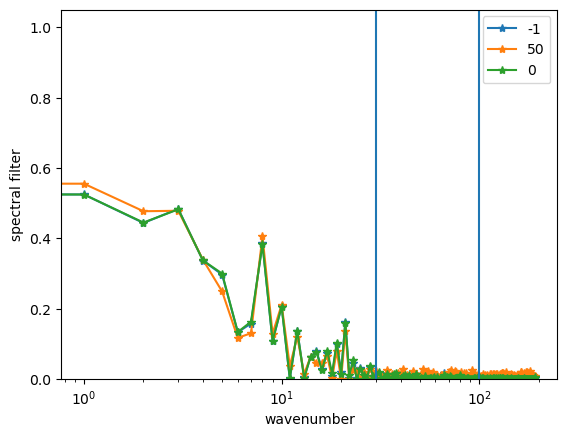

In [ ]:

all_filters = glob("/glade/derecho/scratch/dkimpara/CREDIT_runs/fcnn_12h_amp/debug_skebs/spectral_filter_*")
base_path = "/glade/derecho/scratch/dkimpara/CREDIT_runs/fcnn_12h_amp/debug_skebs/spectral_filter_"

timestep = "13900"
spectral_filter = torch.load(base_path + timestep, map_location="cpu").detach().squeeze().numpy()
plt.plot(np.arange(spectral_filter.shape[0]), spectral_filter, marker="*", label=index)

index = 50
spectral_filter = torch.load(base_path + "7000", map_location="cpu").detach().squeeze().numpy()
print(all_filters[index])

plt.plot(np.arange(spectral_filter.shape[0]), spectral_filter, marker="*", label=index)

index = 0
spectral_filter = torch.load(base_path + "100", map_location="cpu").detach().squeeze().numpy()
print(all_filters[index])

plt.plot(np.arange(spectral_filter.shape[0]), spectral_filter, marker="*", label=index)

plt.xscale("log")
plt.axvline(30)
plt.axvline(100)
plt.legend()

plt.ylim(0)
plt.xlabel("wavenumber")
plt.ylabel("spectral filter")

In [ ]:
backscatter_array = model_state_dict[postblock_keys[-1]]

In [5]:
# rollout_dir = "/glade/derecho/scratch/dkimpara/CREDIT_runs/archive_skebs/skebs_fcnn_scaled_train"
# rollout_dir = "/glade/derecho/scratch/dkimpara/CREDIT_runs/skebs_fcnn_12_24h"
# rollout_dir = "/glade/derecho/scratch/dkimpara/CREDIT_runs/skebs_fcnn_24h"
# rollout_dir = "/glade/derecho/scratch/dkimpara/CREDIT_runs/conv_12h_skebs"
# rollout_dir = "/glade/derecho/scratch/dkimpara/CREDIT_runs/fcnn_36h_skebs"
# rollout_dir = "/glade/derecho/scratch/dkimpara/CREDIT_runs/fcnn_12h_train_a_filter"
rollout_dir = "/glade/derecho/scratch/dkimpara/CREDIT_runs/skebs_fcnn_scaled_train"

all_rollout_files = glob(join(rollout_dir, "backscatter/*"))
rollout_files = all_rollout_files[:len(all_rollout_files) // 8]

config = join(rollout_dir, "model.yml")
with open(config) as cf:
    conf = yaml.load(cf, Loader=yaml.FullLoader)

static_ds = xr.open_dataset(conf["data"]["save_loc_static"])


In [ ]:
# file = "/glade/derecho/scratch/dkimpara/CREDIT_runs/skebs_fcnn_scaled_train/debug_skebs/u_perturb_15"
file = "/glade/derecho/scratch/dkimpara/CREDIT_runs/skebs_fcnn_scaled_train/backscatter/backscatter_15"
backscatter = torch.load(file, map_location="cpu").squeeze().detach()
da = xr.DataArray(backscatter, coords={"ensemble_member_label": np.arange(backscatter.shape[0]),
                                        "level": np.arange(backscatter.shape[1]),
                                       "latitude": static_ds.latitude,
                                       "longitude": static_ds.longitude })
da.ensemble_member_label

/glade/derecho/scratch/dkimpara/tmp/ipykernel_21856/3911821864.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  backscatter = torch.load(file, map_location="cpu").squeeze

<xarray.DataArray 'ensemble_member_label' (ensemble_member_label: 16)> Size: 128B
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])
Coordinates:
  * ensemble_member_label  (ensemble_member_label) int64 128B 0 1 2 ... 13 14 15

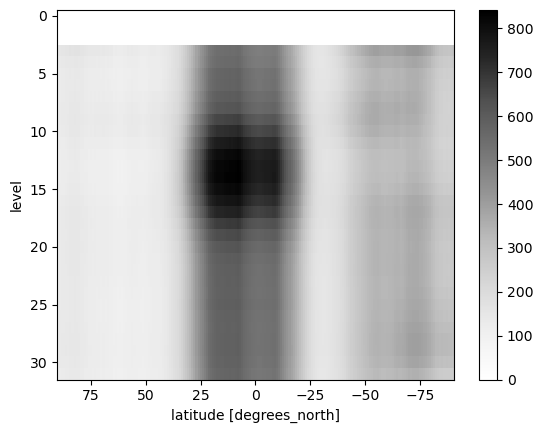

In [28]:
# plot lon average over levels
lon_avg = da.mean(dim=["longitude", "ensemble_member_label"])
lon_avg.plot(yincrease=False, xincrease=False, cmap="Greys", vmin=0)



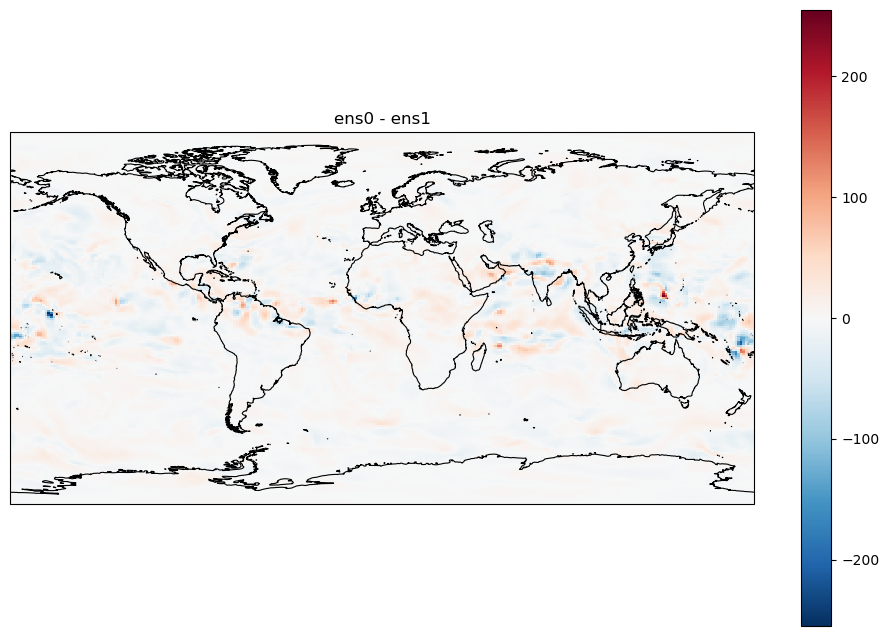

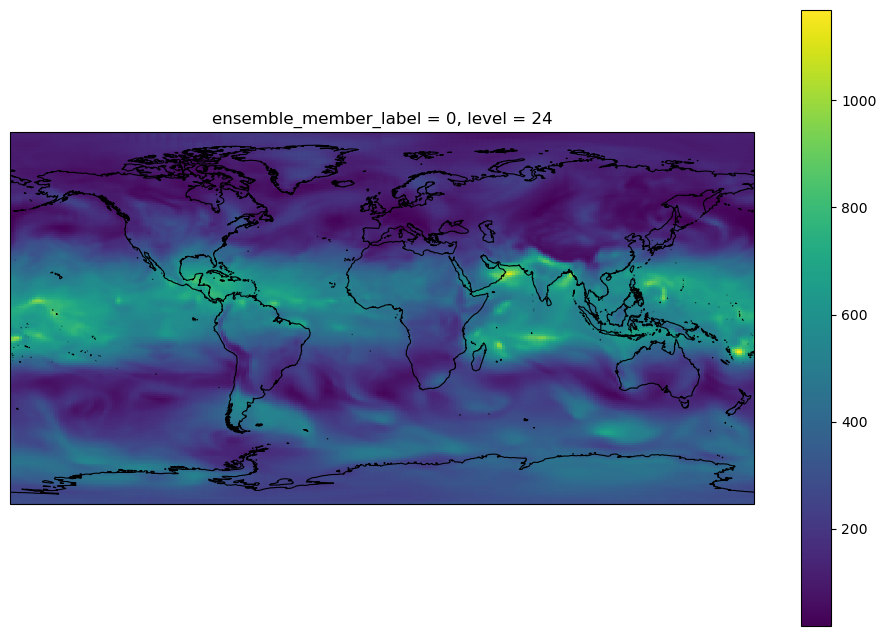

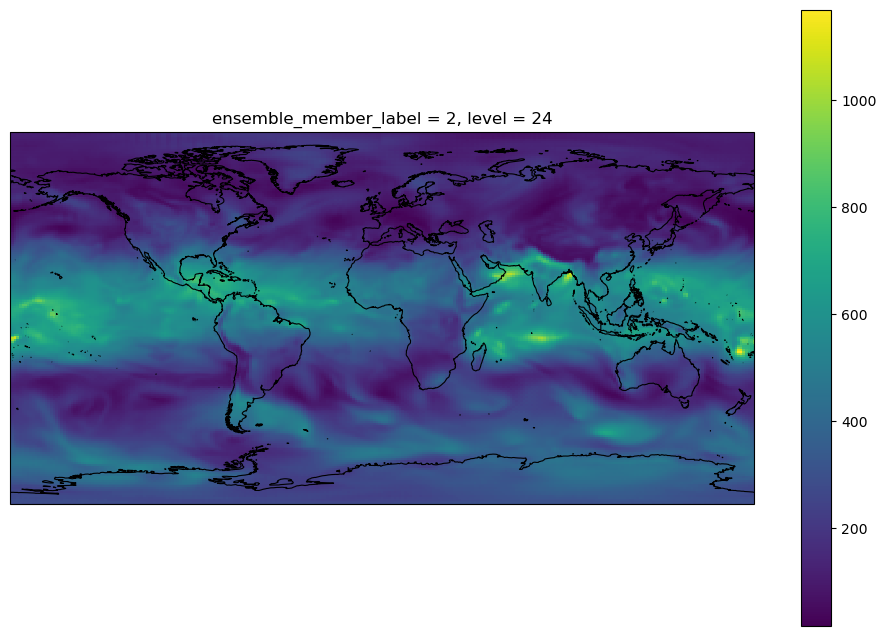

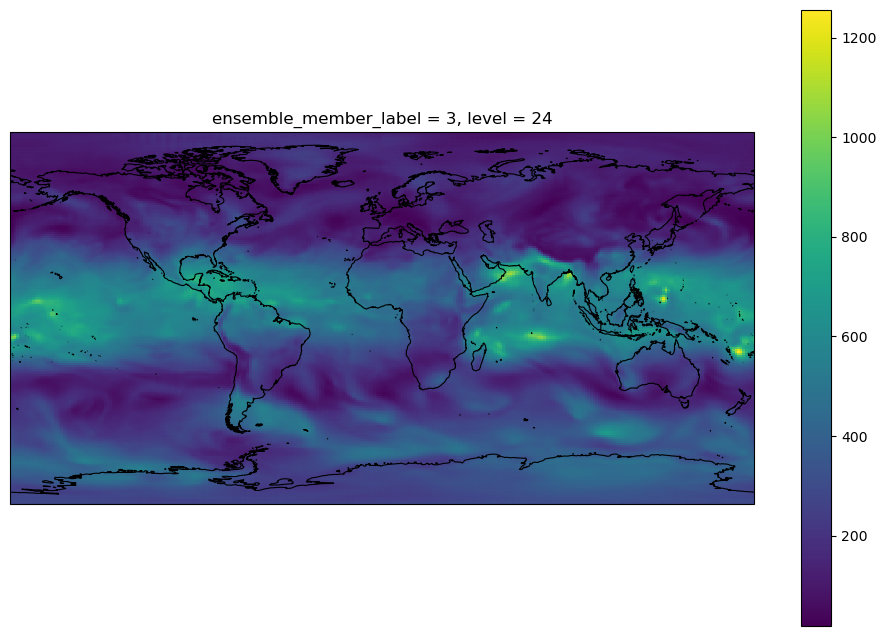

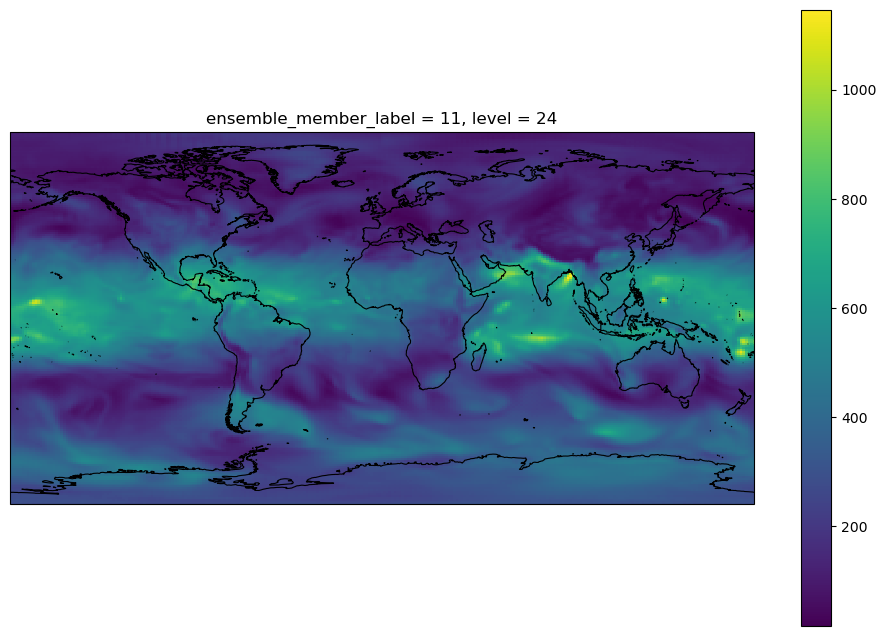

In [29]:
def plot_ens_member(member):
       fig = plt.figure(figsize=(12, 8))
       # Set up the map projection
       ax = plt.axes(projection=ccrs.PlateCarree())
       level = 24
       
       # magnitude = 0.1 * np.sqrt(da.sel(ensemble_member_label=member, level=20))
       magnitude = da.sel(ensemble_member_label=member, level=level)
       magnitude.plot(ax=ax, transform=ccrs.PlateCarree())

       ax.coastlines(resolution='50m', color='black', linewidth=0.8)

       # plt.title(f"perturbation magnitude (m/s) level {level}")
       plt.show()

def plot_diff():
       fig = plt.figure(figsize=(12, 8))
       # Set up the map projection
       ax = plt.axes(projection=ccrs.PlateCarree())
       
       diff = da.sel(ensemble_member_label=0, level=20) - da.sel(ensemble_member_label=1, level=20)
       
       diff.plot(ax=ax, transform=ccrs.PlateCarree())

       ax.coastlines(resolution='50m', color='black', linewidth=0.8)
       plt.title("ens0 - ens1")
       plt.show()


plot_diff()
plot_ens_member(0)
plot_ens_member(2)
plot_ens_member(3)
plot_ens_member(11)